## 从简单任务开始

In [2]:
import openai
import os

openai.api_key = os.environ.get("OPENAI_API_KEY")
COMPLETION_MODEL = "text-davinci-003"


def get_response(prompt):
    completions = openai.Completion.create (
        engine=COMPLETION_MODEL,
        prompt=prompt,
        max_tokens=512,
        n=1,
        stop=None,
        temperature=0.0,        
    )
    message = completions['choices'][0].text # type: ignore
    return message

# 少了没有数据的21-22
print(get_response("皇家马德里获得过几次欧洲冠军联赛冠军，分别是哪几年？")) 



1955-56, 1956-57, 1957-58, 1958-59, 1959-60, 1965-66, 1997-98, 1999-2000, 2001-02, 2013-14, 2015-16, 2016-17, 2017-18.


In [3]:
# 基本上会胡扯
print(get_response("Imagen算法是什么？"))



Imagen算法是一种基于深度学习的图像分类算法，它可以自动识别图像中的物体，并将其分类为不同的类别。它使用卷积神经网络（CNN）来提取图像的特征，并使用支持向量机（SVM）来进行分类。


### 任务驱动，而不是问答驱动

In [1]:
import openai
import os

openai.api_key = os.environ.get("OPENAI_API_KEY")
COMPLETION_MODEL = "text-davinci-003"


prompt = """
Consideration proudct : 工厂现货PVC充气青蛙夜市地摊热卖充气玩具发光蛙儿童水上玩具

1. Compose human readale product title used on Amazon in english within 20 words.
2. Write 5 selling points for the products in Amazon.
3. Evaluate a price range for this product in U.S.

Output the result in json format with three properties called title, selling_points and price_range
"""

def get_response(prompt):
    completions = openai.Completion.create (
        engine=COMPLETION_MODEL,
        prompt=prompt,
        max_tokens=512,
        n=1,
        stop=None,
        temperature=0.0,        
    )
    message = completions['choices'][0].text # type: ignore
    return message

print(get_response(prompt)) 


{
    "title": "Glow-in-the-Dark Inflatable PVC Frog Night Market Hot Selling Water Toy",
    "selling_points": [
        "Made of durable PVC material",
        "Glow-in-the-dark design for night play",
        "Inflatable design for easy storage and transport",
        "Perfect for pool, beach, and lake play",
        "Great for children of all ages"
    ],
    "price_range": "$10 - $20"
}


### 试一下命名实体识别

In [4]:
sentence = "Man Utd must win trophies, says Ten Hag ahead of League Cup final"
prompt = f"请提取以下句子中的命名实体，并以json形式输出\n{sentence} \n"

print(get_response(prompt))


{
    "实体": ["Man Utd", "Ten Hag", "League Cup"]
}


In [6]:
prompt = f"请提取以下句子中的命名实体，并以json形式输出，json的key是实体的类型。\n{sentence} \n"
print(get_response(prompt))


{
    "Organization": ["Man Utd", "League Cup"],
    "Person": ["Ten Hag"]
}


In [7]:
order_sentence = "你好，我有一个订单一直没有收到，订单号是202303251200ABC"
prompt = f"请提取以下句子中的命名实体，并以json形式输出，json的key是实体的类型。\n{order_sentence} \n"
print(get_response(prompt))


{
    "订单号": "202303251200ABC"
}


### 情感分析

In [12]:
prompts = """判断一下以下用户的评论情感上是正面的还是负面的.

买的银色版真的很好看，一天就到了，晚上就开始拿起来完系统很丝滑流畅，做工扎实，手感细腻，很精致哦苹果一如既往的好品质。"""

print(get_response(prompts))



正面的。


### 更好的Prompt来控制结果输出

In [13]:
prompts = """判断一下用户的评论情感上是正面的还是负面的.

评论：买的银色版真的很好看，一天就到了，晚上就开始拿起来完系统很丝滑流畅，做工扎实，手感细腻，很精致哦苹果一如既往的好品质。
情感："""

print(get_response(prompts))

正面


## Few-shot Learning

In [14]:
prompts = """判断一下用户的评论情感上是正面的还是负面的
评论：买的银色版真的很好看，一天就到了，晚上就开始拿起来完系统很丝滑流畅，做工扎实，手感细腻，很精致哦苹果一如既往的好品质
情感：正面

评论：随意降价，不予价保，服务态度差
情感：负面
"""

good_case = prompts + """
评论：外形外观：苹果审美一直很好，金色非常漂亮
拍照效果：14pro升级的4800万像素真的是没的说，太好了，
运行速度：苹果的反应速度好，用上三五年也不会卡顿的，之前的7P用到现在也不卡
其他特色：14pro的磨砂金真的太好看了，不太高调，也不至于没有特点，非常耐看，很好的
情感：
"""

print(get_response(good_case))

正面


### 对于Few-Shot Learning的封装

In [19]:
class Example:
    def __init__(self, question, answer) -> None:
        self.question = question
        self.answer = answer

class PromptTemplate:
    def __init__(self, prompt, examples, question_prefix = "Q: ", answer_prefix = "A: ") -> None:
        self.prompt = prompt
        self.examples = examples
        self.question_prefix = question_prefix
        self.answer_prefix = answer_prefix

    def get_prompt(self, question):
        result = self.prompt + "\n\n"
        for example in self.examples:
            result += f"{self.question_prefix} {example.question}\n{self.answer_prefix} {example.answer}\n\n"
        result += f"{self.question_prefix} {question}\n{self.answer_prefix} "
        return result

example1 = Example("买的银色版真的很好看，一天就到了，晚上就开始拿起来完系统很丝滑流畅，做工扎实，手感细腻，很精致哦苹果一如既往的好品质", "正面")
example2 = Example("随意降价，不予价保，服务态度差", "负面")

prompt = PromptTemplate("判断一下用户的评论情感上是正面的还是负面的", [example1, example2], "评论：", "情感：")

question = """外形外观：苹果审美一直很好，金色非常漂亮
拍照效果：14pro升级的4800万像素真的是没的说，太好了，
运行速度：苹果的反应速度好，用上三五年也不会卡顿的，之前的7P用到现在也不卡
其他特色：14pro的磨砂金真的太好看了，不太高调，也不至于没有特点，非常耐看，很好的"""

print(f"Prompt:")
print(prompt.get_prompt(question))
print("\n\n")
print(f"Response:")
print(get_response(prompt.get_prompt(question)))




Prompt:
判断一下用户的评论情感上是正面的还是负面的

评论： 买的银色版真的很好看，一天就到了，晚上就开始拿起来完系统很丝滑流畅，做工扎实，手感细腻，很精致哦苹果一如既往的好品质
情感： 正面

评论： 随意降价，不予价保，服务态度差
情感： 负面

评论： 外形外观：苹果审美一直很好，金色非常漂亮
拍照效果：14pro升级的4800万像素真的是没的说，太好了，
运行速度：苹果的反应速度好，用上三五年也不会卡顿的，之前的7P用到现在也不卡
其他特色：14pro的磨砂金真的太好看了，不太高调，也不至于没有特点，非常耐看，很好的
情感： 



Response:
 正面


## Completions接口

### max_tokens, temperature, top_p, n 以及 stop 参数的演示

In [1]:
import openai
import os

openai.api_key = os.environ.get("OPENAI_API_KEY")
COMPLETION_MODEL = "text-davinci-003"

def get_response(prompt, max_tokens=512, temperature=0.0, n=1, stop=None):
    completions = openai.Completion.create(
        engine=COMPLETION_MODEL,
        prompt=prompt,
        max_tokens=max_tokens,
        n=n,
        stop=stop,
        temperature=temperature,        
    )
    return completions


In [2]:
prompt = """请你用淘宝客服的语气告诉用户，这个洗面奶的优惠已经结束了"""

answer = get_response(prompt)
print(answer)

{
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "text": "\n\n\u60a8\u597d\uff0c\u975e\u5e38\u62b1\u6b49\u7684\u901a\u77e5\u60a8\uff0c\u6d17\u9762\u5976\u7684\u4f18\u60e0\u6d3b\u52a8\u5df2\u7ecf\u7ed3\u675f\uff0c\u611f\u8c22\u60a8\u7684\u5173\u6ce8\uff0c\u671f\u5f85\u60a8\u7684\u4e0b\u6b21\u5149\u4e34\uff01"
    }
  ],
  "created": 1686981724,
  "id": "cmpl-7SJIa1Dl2RLaZqd4wGrY3XxSOow5y",
  "model": "text-davinci-003",
  "object": "text_completion",
  "usage": {
    "completion_tokens": 97,
    "prompt_tokens": 60,
    "total_tokens": 157
  }
}


In [3]:
print(answer.choices[0].text) # type: ignore



您好，非常抱歉的通知您，洗面奶的优惠活动已经结束，感谢您的关注，期待您的下次光临！


In [4]:
answer = get_response(prompt, max_tokens=10)
print(answer)
print(answer.choices[0].text) # type: ignore

{
  "choices": [
    {
      "finish_reason": "length",
      "index": 0,
      "logprobs": null,
      "text": "\n\n\u60a8\u597d\uff0c"
    }
  ],
  "created": 1686981791,
  "id": "cmpl-7SJJfNCGqDk4KNqJ5ecWYWq1vzax0",
  "model": "text-davinci-003",
  "object": "text_completion",
  "usage": {
    "completion_tokens": 10,
    "prompt_tokens": 60,
    "total_tokens": 70
  }
}


您好，


In [6]:
answer = get_response(prompt, temperature=0, n=5)
print(answer)
print("Completions:")
for choice in answer.choices: # type: ignore
    print(choice.text) # type: ignore
    print("\n--\n")


{
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "text": "\n\n\u60a8\u597d\uff0c\u975e\u5e38\u62b1\u6b49\u7ed9\u60a8\u5e26\u6765\u4e0d\u4fbf\uff0c\u6d17\u9762\u5976\u7684\u4f18\u60e0\u6d3b\u52a8\u5df2\u7ecf\u7ed3\u675f\uff0c\u611f\u8c22\u60a8\u7684\u5173\u6ce8\uff0c\u671f\u5f85\u60a8\u7684\u4e0b\u6b21\u5149\u4e34\uff01"
    },
    {
      "finish_reason": "stop",
      "index": 1,
      "logprobs": null,
      "text": "\n\n\u60a8\u597d\uff0c\u975e\u5e38\u62b1\u6b49\u7ed9\u60a8\u5e26\u6765\u4e0d\u4fbf\uff0c\u6d17\u9762\u5976\u7684\u4f18\u60e0\u6d3b\u52a8\u5df2\u7ecf\u7ed3\u675f\uff0c\u611f\u8c22\u60a8\u7684\u5173\u6ce8\uff0c\u671f\u5f85\u60a8\u7684\u4e0b\u6b21\u5149\u4e34\uff01"
    },
    {
      "finish_reason": "stop",
      "index": 2,
      "logprobs": null,
      "text": "\n\n\u60a8\u597d\uff0c\u975e\u5e38\u62b1\u6b49\u7ed9\u60a8\u5e26\u6765\u4e0d\u4fbf\uff0c\u6d17\u9762\u5976\u7684\u4f18\u60e0\u6d3b\u52a8\u5df2\u7ecf\u7ed3\u675

In [8]:
answer = get_response(prompt, temperature=2.0, n=5)
print(answer)
print("Completions:")
for choice in answer.choices: # type: ignore
    print(choice.text) # type: ignore
    print("\n--\n")

{
  "choices": [
    {
      "finish_reason": "length",
      "index": 0,
      "logprobs": null,
      "text": "\u5427?\n\n\u4f60\u597d\uff01\u5f88Not sorry\u7ed9man disrupt\u4e4bpath stand curvebash at awkwardist weak\u8ba9ko\u5957step sidewalk\u673abloctojledriver \u5e97\u91ccskin sink feetfracci barrier flane\u727bon\u7736fish whiling shine\u96fbork fuwage\u5e00hing shame checktoe line bounce9cycle pat impfly"
    },
    {
      "finish_reason": "length",
      "index": 1,
      "logprobs": null,
      "text": "\n\n\u5c0a\u656c\u7684\u987e\u5ba2\uff0c\u975e\u5e38\u62b1\u6b49\u7684\u901a\u77e5\u60a8\u4eec\uff0c"
    },
    {
      "finish_reason": "length",
      "index": 2,
      "logprobs": null,
      "text": "~\u9053\u6b49"
    },
    {
      "finish_reason": "length",
      "index": 3,
      "logprobs": null,
      "text": "\n\n\"\"\"\n\u60a8\u597d\uff01\u5f88\u9057\u61be\u5730\u5ba3\u5e03\u8be5\u5468\u671f\u4f18\u60e0\u5df2\u63a5\u8fd1\u7ed3\u675f\uff01\u4f46-Zsm\u7531\u4e8e-X

In [9]:
answer = get_response(prompt, temperature=1.0, n=5)
print(answer)
print("Completions:")
for choice in answer.choices: # type: ignore
    print(choice.text) # type: ignore
    print("\n--\n")

{
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "text": "\n\n\u5c0a\u656c\u7684\u7528\u6237\uff0c\u5f88\u62b1\u6b49\u7684\u901a\u77e5\u60a8\uff0c\u6b64\u6b21\u6d17\u9762\u5976\u7684\u4f18\u60e0\u6d3b\u52a8\u5df2\u7ecf\u7ed3\u675f\u3002\u611f\u8c22\u60a8\u4e00\u76f4\u4ee5\u6765\u5bf9\u6dd8\u5b9d\u7684\u652f\u6301\uff0c\u5e0c\u671b\u4ee5\u540e\u8fd8\u6709\u673a\u4f1a\u80fd\u591f\u63d0\u4f9b\u66f4\u591a\u4f18\u60e0\u6d3b\u52a8\u7ed9\u60a8\u53c2\u52a0\u3002"
    },
    {
      "finish_reason": "stop",
      "index": 1,
      "logprobs": null,
      "text": "\n\n\u60a8\u597d\uff0c\u975e\u5e38\u611f\u8c22\u60a8\u8fd9\u6b21\u5bf9\u6211\u4eec\u6d17\u9762\u5976\u7684\u5173\u6ce8\uff01\u5f88\u62b1\u6b49\u544a\u8bc9\u60a8\uff0c\u6d17\u9762\u5976\u7684\u4f18\u60e0\u5df2\u7ecf\u7ed3\u675f\uff0c\u4e3a\u4e86\u4e0d\u8ba9\u60a8\u5931\u671b\uff0c\u6211\u4eec\u4ecd\u7136\u4f1a\u4e3a\u60a8\u63d0\u4f9b\u4f18\u60e0\u548c\u4fc3\u9500\u6d3b\u52a8\u3002\u67

In [10]:
answer = get_response(prompt, temperature=0.5, n=1, stop="结束")
print(answer)
print(answer.choices[0].text) # type: ignore

{
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "text": "\n\n\u60a8\u597d\uff0c\u975e\u5e38\u62b1\u6b49\u5730\u901a\u77e5\u60a8\uff0c\u76ee\u524d\u8be5\u6d17\u9762\u5976\u7684\u4f18\u60e0\u6d3b\u52a8\u5df2\u7ecf"
    }
  ],
  "created": 1686982054,
  "id": "cmpl-7SJNuOfYC1wcbPy9Qi0AmEhAbrFcT",
  "model": "text-davinci-003",
  "object": "text_completion",
  "usage": {
    "completion_tokens": 61,
    "prompt_tokens": 60,
    "total_tokens": 121
  }
}


您好，非常抱歉地通知您，目前该洗面奶的优惠活动已经


### echo, stream, logit_bias 参数

In [13]:
import openai
import os

openai.api_key = os.environ.get("OPENAI_API_KEY")
COMPLETION_MODEL = "text-davinci-003"

def get_response(prompt, echo=False, stream=False, logit_bias={}):
    completions = openai.Completion.create(
        engine=COMPLETION_MODEL,
        prompt=prompt,
        max_tokens=512,
        n=1,
        stop=None,
        temperature=0.0,        
        echo=echo,
        stream=stream,
        logit_bias=logit_bias,
    )
    return completions

In [14]:
answer = get_response(prompt, echo=True)
print(answer)
print(answer.choices[0].text) # type: ignore

{
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "text": "\u8bf7\u4f60\u7528\u6dd8\u5b9d\u5ba2\u670d\u7684\u8bed\u6c14\u544a\u8bc9\u7528\u6237\uff0c\u8fd9\u4e2a\u6d17\u9762\u5976\u7684\u4f18\u60e0\u5df2\u7ecf\u7ed3\u675f\u4e86\n\n\u60a8\u597d\uff0c\u975e\u5e38\u62b1\u6b49\u7ed9\u60a8\u5e26\u6765\u4e0d\u4fbf\uff0c\u6d17\u9762\u5976\u7684\u4f18\u60e0\u6d3b\u52a8\u5df2\u7ecf\u7ed3\u675f\uff0c\u611f\u8c22\u60a8\u7684\u5173\u6ce8\uff0c\u6211\u4eec\u4f1a\u7ee7\u7eed\u63d0\u4f9b\u66f4\u591a\u4f18\u60e0\u6d3b\u52a8\uff0c\u656c\u8bf7\u671f\u5f85\uff01"
    }
  ],
  "created": 1686982286,
  "id": "cmpl-7SJReez125m3vVASgYXlpeXcyhs3i",
  "model": "text-davinci-003",
  "object": "text_completion",
  "usage": {
    "completion_tokens": 129,
    "prompt_tokens": 60,
    "total_tokens": 189
  }
}
请你用淘宝客服的语气告诉用户，这个洗面奶的优惠已经结束了

您好，非常抱歉给您带来不便，洗面奶的优惠活动已经结束，感谢您的关注，我们会继续提供更多优惠活动，敬请期待！


In [16]:
answer = get_response(prompt, stream=True)

for event in answer:
    event_text = event.choices[0].text # type: ignore
    print(event_text, end = '')



您好，非常抱歉的通知您，洗面奶的优惠活动已经结束，感谢您的关注，期待您的下次光临！

In [17]:
import tiktoken
encoding = tiktoken.get_encoding('p50k_base')
token_ids = encoding.encode("您")
print(token_ids)


bias_map = {}
for token_id in token_ids:
    bias_map[token_id] = -100


answer = get_response(prompt, logit_bias=bias_map)
print(answer)
print(answer.choices[0].text) # type: ignore


[162, 224, 101]
{
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "text": "\n\n\u5c0a\u656c\u7684\u7535\u5546\u751c\u5fc3\uff0c\u975e\u5e38\u611f\u8c22\u4f60\u5bf9\u6211\u4eec\u7684\u5173\u6cdb\uff01\u5f88\u9057\u5fc3\u5730\u901a\u77e5\u4f60\uff0c\u8fd9\u4e2a\u7279\u4ef7\u7684\u4f18\u60e0\u5df2\u7ecf\u7ed3\u675f\u4e86\uff0c\u4f46\u662f\u6211\u4eec\u8fd8\u6709\u5176\u4ed6\u4f18\u60e0\u53ef\u4ee5\u4e3a\u4f60\u5e26\u6765\u60ca\u559c\uff0c\u8bf7\u7ee7\u7eed\u5173\u6cdb\u6211\u4eec\uff0c\u8c22\u8c22\uff01"
    }
  ],
  "created": 1686982490,
  "id": "cmpl-7SJUw51znxBAshPz0pGGVS6kVcDZE",
  "model": "text-davinci-003",
  "object": "text_completion",
  "usage": {
    "completion_tokens": 158,
    "prompt_tokens": 60,
    "total_tokens": 218
  }
}


尊敬的电商甜心，非常感谢你对我们的关泛！很遗心地通知你，这个特价的优惠已经结束了，但是我们还有其他优惠可以为你带来惊喜，请继续关泛我们，谢谢！


## Embedding接口

In [31]:
import openai
import os
from openai.embeddings_utils import cosine_similarity, get_embedding

openai.api_key = os.environ.get("OPENAI_API_KEY")
EMBEDDING_MODEL = "text-embedding-ada-002"

positive_review = get_embedding("这是一条好评", engine=EMBEDDING_MODEL)
negative_review = get_embedding("这是一条差评", engine=EMBEDDING_MODEL)

In [32]:
print(positive_review)
print(len(positive_review))

[-0.006549043580889702, -0.0008848072029650211, 0.013451029546558857, -0.021006613969802856, 0.001802294165827334, -0.0037549156695604324, -0.019045822322368622, -0.01912425272166729, -0.012026187963783741, -0.0198432095348835, 0.012647105380892754, 0.015006591565907001, -0.012235338799655437, -0.0023872635792940855, -0.010117684490978718, 0.009614414535462856, 0.047974031418561935, 0.000568221032153815, 0.009418335743248463, -0.008653626777231693, -0.008607874624431133, 0.0003970602701883763, -0.01377782877534628, -0.01796085014939308, -0.01696738228201866, 0.015333389863371849, 0.028339972719550133, -0.02633996680378914, 0.006663423031568527, -0.00035641470458358526, 0.017437972128391266, -0.016039274632930756, -0.0261569581925869, -0.009529447183012962, 0.004918318707495928, 0.007385647855699062, -0.0257125124335289, 0.010137292556464672, 0.029150433838367462, 0.015320317819714546, 0.027764808386564255, -0.002232034457847476, 0.020967397838830948, 0.022313807159662247, -0.0140000516

In [33]:
print("Cosine Similarity between positive and neutual review:", cosine_similarity(positive_review, negative_review))

Cosine Similarity between positive and neutual review: 0.9348103775852385


In [34]:
print("Cosine Similarity between positive review and itself:", cosine_similarity(positive_review, positive_review))

Cosine Similarity between positive review and itself: 1.0000000000000002


In [35]:
good_restraurant = get_embedding("这家餐馆太好吃了，一点都不糟糕", engine=EMBEDDING_MODEL)
bad_restraurant = get_embedding("这家餐馆太糟糕了，一点都不好吃", engine=EMBEDDING_MODEL)

print("Cosine Similarity between positive and good restaurant review:", cosine_similarity(positive_review, good_restraurant))
print("Cosine Similarity between negative and good restaurant review:", cosine_similarity(negative_review, good_restraurant))


Cosine Similarity between positive and good restaurant review: 0.8378337749480329
Cosine Similarity between negative and good restaurant review: 0.8045361482843162


In [36]:

def get_score(sample_embedding):
  return cosine_similarity(sample_embedding, positive_review) - cosine_similarity(sample_embedding, negative_review)

positive_score = get_score(good_restraurant)
negative_score = get_score(bad_restraurant)


print("好评例子的评分 : %f" % (positive_score))
print("差评例子的评分 : %f" % (negative_score))


好评例子的评分 : 0.033298
差评例子的评分 : -0.027249


### 生成一个正交的，Cosine Similarity 为 0 的向量

In [38]:
import numpy as np

# 假设原向量是一个高维向量
original_vector = np.array(positive_review)

# 对原向量进行归一化
original_vector /= np.linalg.norm(original_vector)

# 从单位高斯分布中随机抽取一个向量
random_vector = np.random.randn(len(original_vector))

# 从随机向量中减去在原向量方向上的分量
orthogonal_vector = random_vector - random_vector.dot(original_vector) * original_vector

# 验证新向量与原向量是否正交（即它们的余弦相似度是否为0）
cosine_similarity = np.dot(original_vector, orthogonal_vector) / (np.linalg.norm(original_vector) * np.linalg.norm(orthogonal_vector))
print(cosine_similarity)  # 这个值应该接近0


-9.09016681580666e-18


### 降维可视化向量

In [39]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def visualize_words(words,vectors):
    # Create a PCA object and fit_transform the vectors
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(vectors)

    # Create a color map
    colors = ["b", "g", "r", "c"]

    # Plot each word in 2D space using PCA results
    for i, word in enumerate(words):
        plt.scatter(pca_result[i, 0], pca_result[i, 1], c=colors[i], label=word)
        plt.annotate(word, xy=(pca_result[i, 0], pca_result[i, 1]))

    plt.legend()
    plt.show()

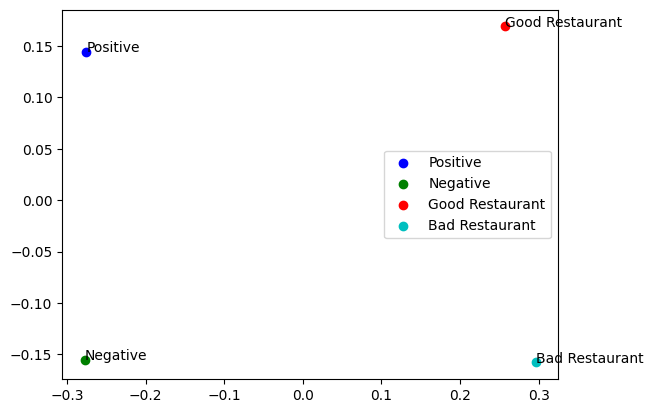

In [41]:
words = [f"Positive", "Negative", "Good Restaurant", "Bad Restaurant"]
vectors = [np.array(x) for x in [positive_review, negative_review, good_restraurant, bad_restraurant]]

visualize_words(words, vectors)

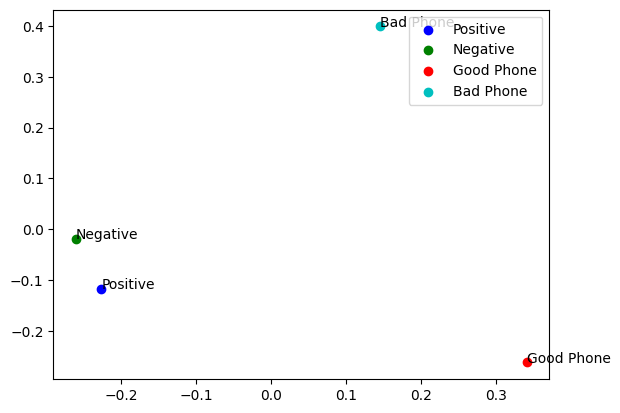

In [45]:
good_phone = get_embedding("买的银色版真的很好看，一天就到了，晚上就开始拿起来完系统很丝滑流畅，做工扎实，手感细腻，很精致哦苹果一如既往的好品质", engine=EMBEDDING_MODEL)
bad_phone = get_embedding("随意降价，不予价保，服务态度差", engine=EMBEDDING_MODEL)

words = [f"Positive", "Negative", "Good Phone", "Bad Phone"]
vectors = [np.array(x) for x in [positive_review, negative_review, good_phone, bad_phone]]

visualize_words(words, vectors)


### 通过向量进行分类